Imports sraty pierdaty


In [155]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [156]:
dataFrame = pd.read_csv("Data/processed_dataset.csv")
dataFrame.head()

,Unnamed: 0,Make,Model,Engine Size(L),Cylinders,Fuel Consumption(Hwy (L/100 km)),Drag coefficient
0,0,Acura,ILX,2.4,4,7.0,0.30
1,1,Acura,MDX SH-AWD,3.5,6,9.4,0.37
2,2,Acura,RDX SH-AWD,2.0,4,8.6,0.37
3,3,Acura,RDX SH-AWD A-SPEC,2.0,4,9.1,0.37
4,4,Acura,TLX SH-AWD,2.0,4,8.0,0.30


In [157]:
dataFrame = dataFrame.sort_values(by ='Engine Size(L)')
print(dataFrame.dtypes)

Unnamed: 0                            int64
Make                                 object
Model                                object
Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption(Hwy (L/100 km))    float64
Drag coefficient                    float64
dtype: object


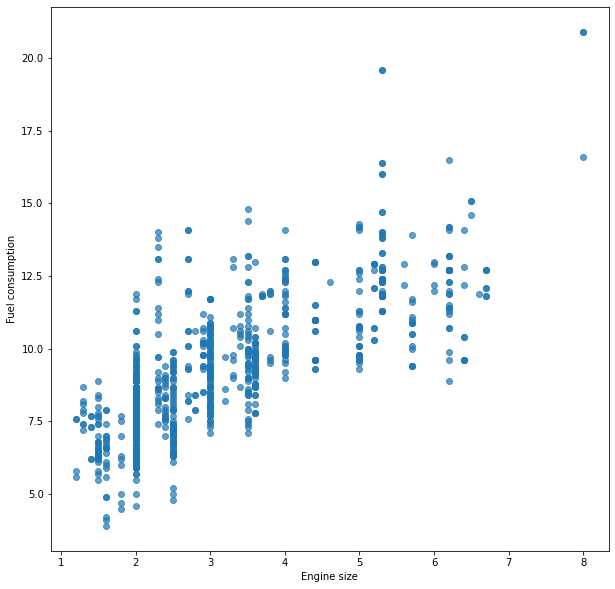

In [158]:
plt.figure(0,figsize=(10,10))
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'],alpha=0.7,marker='o')
plt.xlabel('Engine size')
plt.ylabel('Fuel consumption')
plt.show()

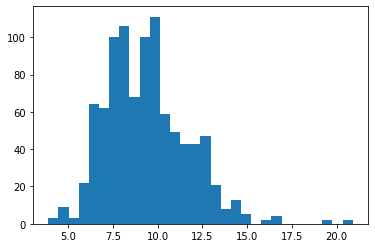

In [159]:
plt.hist(dataFrame["Fuel Consumption(Hwy (L/100 km))"],bins=30)
plt.show()

In [160]:
N = dataFrame.shape[0]
engine_size_data = dataFrame['Engine Size(L)']
cylinders_data = dataFrame['Cylinders']
drag_coeficient_data = dataFrame['Drag coefficient']
fuel_consumption_data = dataFrame['Fuel Consumption(Hwy (L/100 km))']

In [161]:
model_1_prior=CmdStanModel(stan_file='Stan_files/model_1_prior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [162]:
samples_1_prior = model_1_prior.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data},
iter_sampling=1,
iter_warmup=2000,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [163]:
dataFrame_model_1_prior = samples_1_prior.draws_pd()
dataFrame_model_1_prior.head()


,lp__,accept_stat__,alpha,beta_engine_size,beta_drag_coeficient,sigma,fuel_consumption[1],fuel_consumption[2],fuel_consumption[3],fuel_consumption[4],...,fuel_consumption[937],fuel_consumption[938],fuel_consumption[939],fuel_consumption[940],fuel_consumption[941],fuel_consumption[942],fuel_consumption[943],fuel_consumption[944],fuel_consumption[945],fuel_consumption[946]
0,0.0,0.0,15.5617,0.777181,-1.27227,2.12759,13.1565,16.6364,18.574,20.8433,...,19.3433,17.7769,17.0991,16.8279,18.4781,22.488,16.5567,17.6787,20.9048,21.8884


In [164]:
list = []
for i in range(1,N):
    val = dataFrame_model_1_prior['fuel_consumption[' + str(i)+ ']'].mean()
    list.append(val)


(array([ 1.,  1.,  2.,  3.,  6., 11., 14., 23., 29., 45., 44., 56., 69.,
        72., 75., 75., 77., 59., 67., 51., 44., 34., 28., 15., 11., 12.,
         9.,  7.,  3.,  2.]),
 array([10.219     , 10.69980667, 11.18061333, 11.66142   , 12.14222667,
        12.62303333, 13.10384   , 13.58464667, 14.06545333, 14.54626   ,
        15.02706667, 15.50787333, 15.98868   , 16.46948667, 16.95029333,
        17.4311    , 17.91190667, 18.39271333, 18.87352   , 19.35432667,
        19.83513333, 20.31594   , 20.79674667, 21.27755333, 21.75836   ,
        22.23916667, 22.71997333, 23.20078   , 23.68158667, 24.16239333,
        24.6432    ]),
 <BarContainer object of 30 artists>)

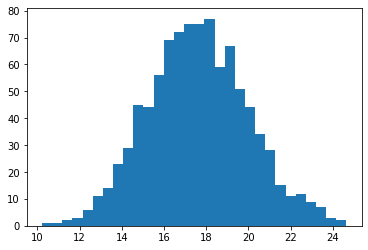

In [165]:
plt.hist(list,bins=30)

In [166]:
model_1_post=CmdStanModel(stan_file='Stan_files/model_1_post.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [167]:
samples_1_post = model_1_post.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data, 'fuel_consumption':fuel_consumption_data},
iter_sampling=1,
iter_warmup=200,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                   


INFO:cmdstanpy:CmdStan done processing.


In [168]:
dataFrame_model_1_post = samples_1_post.draws_pd()
dataFrame_model_1_post.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_engine_size,beta_drag_coeficient,...,log_lik[937],log_lik[938],log_lik[939],log_lik[940],log_lik[941],log_lik[942],log_lik[943],log_lik[944],log_lik[945],log_lik[946]
0,-826.522,0.999559,0.107833,5.0,31.0,0.0,827.139,2.93638,1.09885,8.14993,...,-1.49691,-1.26554,-1.26554,-1.26554,-1.49691,-1.54658,-1.54658,-12.0484,-2.51252,-12.0484


In [169]:
list = []
for i in range(1,N):
    val = dataFrame_model_1_post['y_out[' + str(i)+ ']'].mean()
    list.append(val)


(array([ 1.,  1.,  2.,  8.,  6., 12., 20., 28., 43., 46., 62., 64., 87.,
        63., 76., 70., 61., 62., 47., 38., 33., 28., 30., 18., 17.,  7.,
         6.,  6.,  1.,  2.]),
 array([ 3.12437   ,  3.55685767,  3.98934533,  4.421833  ,  4.85432067,
         5.28680833,  5.719296  ,  6.15178367,  6.58427133,  7.016759  ,
         7.44924667,  7.88173433,  8.314222  ,  8.74670967,  9.17919733,
         9.611685  , 10.04417267, 10.47666033, 10.909148  , 11.34163567,
        11.77412333, 12.206611  , 12.63909867, 13.07158633, 13.504074  ,
        13.93656167, 14.36904933, 14.801537  , 15.23402467, 15.66651233,
        16.099     ]),
 <BarContainer object of 30 artists>)

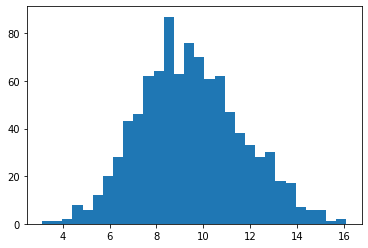

In [170]:
plt.hist(list,bins=30)

In [171]:
model_2_prior=CmdStanModel(stan_file='Stan_files/model_2_prior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [172]:
samples_2_prior = model_2_prior.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data},
iter_sampling=1,
iter_warmup=2000,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [173]:
dataFrame_model_2_prior = samples_2_prior.draws_pd()
dataFrame_model_2_prior.head()


,lp__,accept_stat__,alpha,beta_engine_size,beta_cylinders,beta_drag_coeficient,sigma,fuel_consumption[1],fuel_consumption[2],fuel_consumption[3],...,fuel_consumption[937],fuel_consumption[938],fuel_consumption[939],fuel_consumption[940],fuel_consumption[941],fuel_consumption[942],fuel_consumption[943],fuel_consumption[944],fuel_consumption[945],fuel_consumption[946]
0,0.0,0.0,15.5617,0.777181,-1.27227,0.127591,0.610578,12.8661,13.4477,14.1079,...,4.80138,4.60367,4.52583,5.00854,6.15338,4.448,4.4837,1.33208,1.61435,1.60852


In [174]:
list = []
for i in range(1,N):
    val = dataFrame_model_2_prior['fuel_consumption[' + str(i)+ ']'].mean()
    list.append(val)


(array([  2.,   0.,   0.,   0.,   0.,   0.,   1.,   6.,   3.,   5.,   0.,
          3.,   1.,   3.,   4.,  11.,  15.,  29.,  45.,  71., 107.,  94.,
         83.,  92., 101., 120.,  79.,  50.,  16.,   4.]),
 array([ 1.33208   ,  1.75794067,  2.18380133,  2.609662  ,  3.03552267,
         3.46138333,  3.887244  ,  4.31310467,  4.73896533,  5.164826  ,
         5.59068667,  6.01654733,  6.442408  ,  6.86826867,  7.29412933,
         7.71999   ,  8.14585067,  8.57171133,  8.997572  ,  9.42343267,
         9.84929333, 10.275154  , 10.70101467, 11.12687533, 11.552736  ,
        11.97859667, 12.40445733, 12.830318  , 13.25617867, 13.68203933,
        14.1079    ]),
 <BarContainer object of 30 artists>)

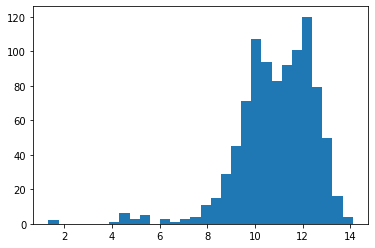

In [175]:
plt.hist(list,bins=30)

In [176]:
generated_fuel_consumption = samples_2_prior.stan_variable('fuel_consumption')

In [177]:
model_2_post=CmdStanModel(stan_file='Stan_files/model_2_post.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [178]:
samples_2_post = model_2_post.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data, 'fuel_consumption':fuel_consumption_data},
iter_sampling=1,
iter_warmup=200,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                   


INFO:cmdstanpy:CmdStan done processing.


In [179]:
dataFrame_model_2_post = samples_2_post.draws_pd()
dataFrame_model_2_post.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_engine_size,beta_cylinders,...,log_lik[937],log_lik[938],log_lik[939],log_lik[940],log_lik[941],log_lik[942],log_lik[943],log_lik[944],log_lik[945],log_lik[946]
0,-796.131,0.965834,0.090928,4.0,23.0,0.0,798.035,2.52955,0.554205,0.466085,...,-2.37996,-1.67394,-1.67394,-1.67394,-2.37996,-2.53017,-2.53017,-6.18686,-1.22055,-6.18686


In [180]:
list = []
for i in range(1,N):
    val = dataFrame_model_2_post['y_out[' + str(i)+ ']'].mean()
    list.append(val)


(array([ 3.,  6.,  6., 16., 26., 46., 60., 56., 94., 96., 82., 99., 65.,
        62., 53., 46., 26., 30., 27., 11., 13., 10.,  6.,  3.,  2.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 3.93381   ,  4.42443633,  4.91506267,  5.405689  ,  5.89631533,
         6.38694167,  6.877568  ,  7.36819433,  7.85882067,  8.349447  ,
         8.84007333,  9.33069967,  9.821326  , 10.31195233, 10.80257867,
        11.293205  , 11.78383133, 12.27445767, 12.765084  , 13.25571033,
        13.74633667, 14.236963  , 14.72758933, 15.21821567, 15.708842  ,
        16.19946833, 16.69009467, 17.180721  , 17.67134733, 18.16197367,
        18.6526    ]),
 <BarContainer object of 30 artists>)

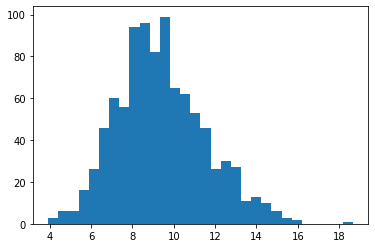

In [181]:
plt.hist(list,bins=30)

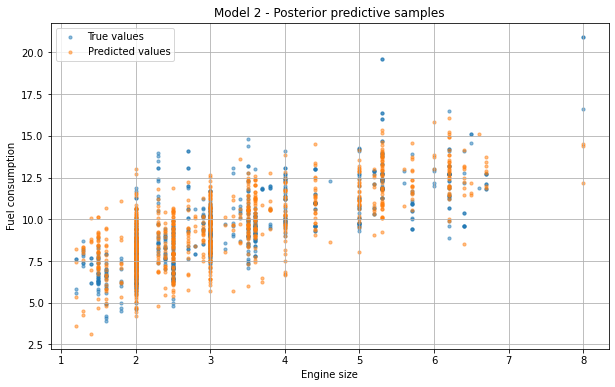

In [201]:
price_sim = samples_1_post.stan_variable('y_out')
plt.figure(figsize=[10,6])
plt.scatter(engine_size_data, fuel_consumption_data, alpha=0.5, s=10)
plt.scatter(engine_size_data, price_sim, alpha=0.5, s=10)
plt.title("Model 2 - Posterior predictive samples")
plt.legend(["True values", "Predicted values"])
plt.xlabel("Engine size")
plt.ylabel("Fuel consumption")
plt.grid()
plt.show()

In [183]:
compare_dict_diff_number_pred = {"1_pred": samples_1_post,"2_pred": samples_2_post}

In [184]:
comp_result_waic = az.compare(compare_dict_diff_number_pred, ic='waic',scale='deviance')

<AxesSubplot:xlabel='Deviance'>

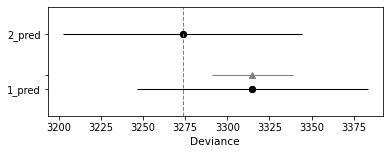

In [185]:
az.plot_compare(comp_result_waic)

In [194]:
def calcQuants(x, y):
    qlvls = [0, 1]
    quansList = [[], []]
    for i in range(y.shape[-1]):
        temp = y[:, i]
        for q, lvl in zip(quansList, qlvls):
            q.append(np.quantile(temp, lvl))
    return quansList

def quantsExtremes(df, y, q):
    carat_uq = df['Engine Size(L)'].unique()
    carat_uq = sorted(carat_uq)
    quansList = calcQuants(df['Engine Size(L)'], y)
    caratQuantDict = dict()
    for carat_val in carat_uq:
        caratList = np.array(df['Engine Size(L)'].tolist())
        idxs = np.where(caratList == carat_val)[0]
        qval = quansList[q][idxs[0]]
        for i in idxs:
            if q == 0 and quansList[q][i] < qval:
                qval = quansList[q][i]
            elif q == 1 and quansList[q][i] > qval:
                qval = quansList[q][i]
        caratQuantDict[carat_val] = qval
    return caratQuantDict

<Figure size 720x432 with 0 Axes>

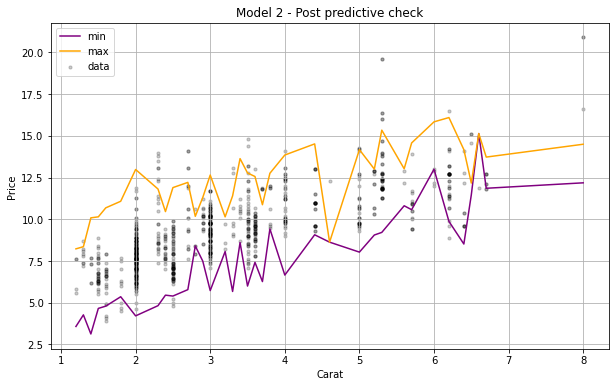

In [224]:
plt.figure(figsize=[10, 6])

price_sim = samples_1_post.stan_variable('y_out')

caratQuantMinDict = quantsExtremes(dataFrame, price_sim, 0)
caratMin = (caratQuantMinDict.keys())
quantMin = (caratQuantMinDict.values())

caratQuantMaxDict = quantsExtremes(dataFrame, price_sim, 1)
caratMax = (caratQuantMaxDict.keys())
quantMax = (caratQuantMaxDict.values())

plt.figure(figsize=[10, 6])
plt.plot(caratMin, quantMin, color='purple')
plt.plot(caratMax, quantMax, color='orange')
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'], color='black', alpha=0.2, s=10)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Model 2 - Post predictive check")
plt.legend(['min', 'max', 'data'])
plt.grid()
plt.show()

<Figure size 720x432 with 0 Axes>

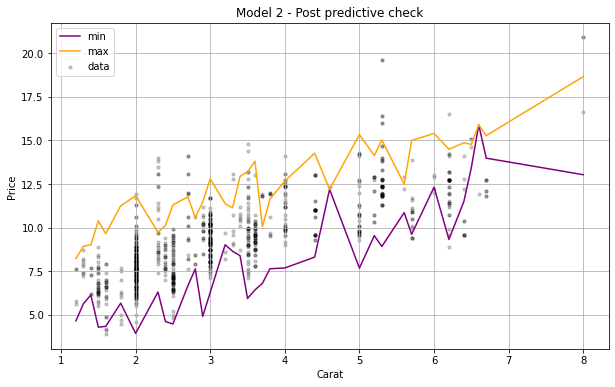

In [223]:
plt.figure(figsize=[10, 6])

price_sim = samples_2_post.stan_variable('y_out')

caratQuantMinDict = quantsExtremes(dataFrame, price_sim, 0)
caratMin = (caratQuantMinDict.keys())
quantMin = (caratQuantMinDict.values())

caratQuantMaxDict = quantsExtremes(dataFrame, price_sim, 1)
caratMax = (caratQuantMaxDict.keys())
quantMax = (caratQuantMaxDict.values())

plt.figure(figsize=[10, 6])
plt.plot(caratMin, quantMin, color='purple')
plt.plot(caratMax, quantMax, color='orange')
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'], color='black', alpha=0.2, s=10)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Model 2 - Post predictive check")
plt.legend(['min', 'max', 'data'])
plt.grid()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'density'

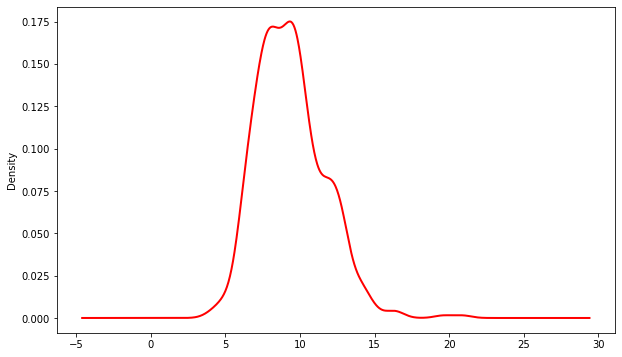

In [229]:
dataFrame['Fuel Consumption(Hwy (L/100 km))'].plot.density(figsize=(10,6), linewidth=2, color='red')
y_out_var = samples_2_post.stan_variable('y_out')

price_sim.density(figsize=(10,6), linewidth=2, color='red')
plt.title('Density plot for Price')
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()

In [186]:
fit_1 = az.from_dict(
    posterior=samples_1_prior,
    log_likelihood={"log_lik": samples_1_prior["log_lik"]},
    observed_data={"fuel_consumption": fuel_consumption_data}
)

fit_2 = az.from_dict(
    posterior=model_2_post,
    log_likelihood={"log_lik": model_2_post["log_lik"]},
    observed_data={"fuel_consumption": fuel_consumption_data}
)

TypeError: 'CmdStanMCMC' object is not subscriptable

In [ ]:
az.plot_compare(comp_result_2_loo)

NameError: name 'comp_result_2_loo' is not defined